In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd


data = pd.read_csv(
    "https://raw.githubusercontent.com/ustunb/risk-slim/master/examples/data/spambase_data.csv",
    sep=",",
)
features = list(data.columns[1:])

categorical_columns = []
X = data[features]
y = data["Spam"]

In [3]:
X

,WordFreqMake,WordFreqAddress,WordFreqAll,WordFreq3D,WordFreqOur,WordFreqOver,WordFreqRemove,WordFreqInternet,WordFreqOrder,WordFreqMail,...,WordFreqConference,CharFreqSemicolon,CharFreqParentheses,CharFreqBracket,CharFreqExcalamationMark,CharFreqDollarSign,CharFreqPound,CapitalRunLengthAverage,CapitalRunLengthLongest,CapitalRunLengthTotal
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

In [5]:
from scorepyo.preprocessing import AutoBinarizer


binarizer = AutoBinarizer(max_number_binaries_by_features=3, keep_negative=True)
binarizer.fit(
    X_train, y_train, categorical_features=categorical_columns, to_exclude_features=None
)

X_train_binarized = binarizer.transform(X_train)
X_test_binarized = binarizer.transform(X_test)

In [6]:
# binarizer.df_score_feature

In [7]:
from scorepyo.models import EBMRiskScore, OptunaRiskScore,EBMRiskScoreNew

optimization_options = {"nb_additional_features":5}
ebm_model = EBMRiskScoreNew(optimization_options=optimization_options, min_point_value=-2, max_point_value=3, optimization_metric='average_precision')
ebm_model.fit(X_train, y_train, categorical_features=categorical_columns)

0.0


c:\Users\S5384228\Anaconda3\envs\env_scorepyo_without_setuppy\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\S5384228\Anaconda3\envs\env_scorepyo_without_setuppy\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\S5384228\Anaconda3\envs\env_scorepyo_without_setuppy\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\S5384228\Anaconda3\envs\env_scorepyo_without_setuppy\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the sol

0.14285714285714285


c:\Users\S5384228\Anaconda3\envs\env_scorepyo_without_setuppy\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\S5384228\Anaconda3\envs\env_scorepyo_without_setuppy\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\S5384228\Anaconda3\envs\env_scorepyo_without_setuppy\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\S5384228\Anaconda3\envs\env_scorepyo_without_setuppy\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the sol

0.2857142857142857


c:\Users\S5384228\Anaconda3\envs\env_scorepyo_without_setuppy\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.42857142857142855


c:\Users\S5384228\Anaconda3\envs\env_scorepyo_without_setuppy\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.5714285714285714


c:\Users\S5384228\Anaconda3\envs\env_scorepyo_without_setuppy\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\S5384228\Anaconda3\envs\env_scorepyo_without_setuppy\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\S5384228\Anaconda3\envs\env_scorepyo_without_setuppy\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\S5384228\Anaconda3\envs\env_scorepyo_without_setuppy\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the sol

0.7142857142857143


c:\Users\S5384228\Anaconda3\envs\env_scorepyo_without_setuppy\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\S5384228\Anaconda3\envs\env_scorepyo_without_setuppy\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\S5384228\Anaconda3\envs\env_scorepyo_without_setuppy\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\S5384228\Anaconda3\envs\env_scorepyo_without_setuppy\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the sol

0.8571428571428571


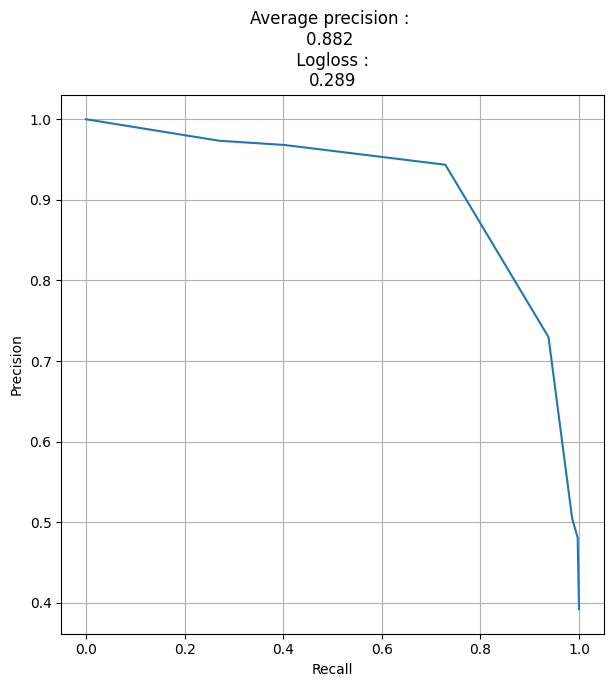

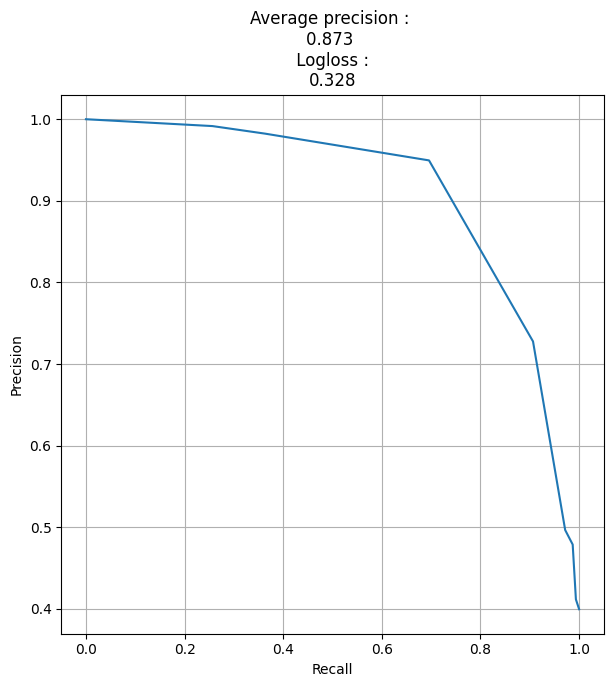

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss

y_proba = ebm_model.predict_proba(X_train)[:, 1].reshape(-1, 1)

precision, recall, thresholds = precision_recall_curve(y_train.astype(int), y_proba)
fig, ax = plt.subplots(figsize=(7, 7))
plt.plot(recall, precision)
average_precision = np.round(average_precision_score(y_train.astype(int), y_proba), 3)
logloss = np.round(log_loss(y_train.astype(int), y_proba), 3)
title_PR_curve = f"Average precision : \n{average_precision} \n Logloss : \n{logloss}"
plt.title(title_PR_curve)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()


y_proba = ebm_model.predict_proba(X_test)[:, 1].reshape(-1, 1)

precision, recall, thresholds = precision_recall_curve(y_test.astype(int), y_proba)
fig, ax = plt.subplots(figsize=(7, 7))
plt.plot(recall, precision)
average_precision = np.round(average_precision_score(y_test.astype(int), y_proba), 3)
logloss = np.round(log_loss(y_test.astype(int), y_proba), 3)
title_PR_curve = f"Average precision : \n{average_precision} \n Logloss : \n{logloss}"
plt.title(title_PR_curve)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

In [9]:
from fasterrisk.fasterrisk import RiskScoreOptimizer, RiskScoreClassifier

sparsity = 4
parent_size = 10
y_train_fasterrisk = np.where(y_train == 0, -1, 1)
RiskScoreOptimizer_m = RiskScoreOptimizer(
    X=X_train_binarized.values,
    y=y_train_fasterrisk,
    lb=-2,
    ub=3,
    k=4,
    parent_size=parent_size,
)

RiskScoreOptimizer_m.optimize()

(
    multipliers,
    sparseDiversePool_beta0_integer,
    sparseDiversePool_betas_integer,
) = RiskScoreOptimizer_m.get_models()

model_index = 0  # first model
multiplier = multipliers[model_index]
intercept = sparseDiversePool_beta0_integer[model_index]
coefficients = sparseDiversePool_betas_integer[model_index]

RiskScoreClassifier_m = RiskScoreClassifier(multiplier, intercept, coefficients)

(3450, 50)


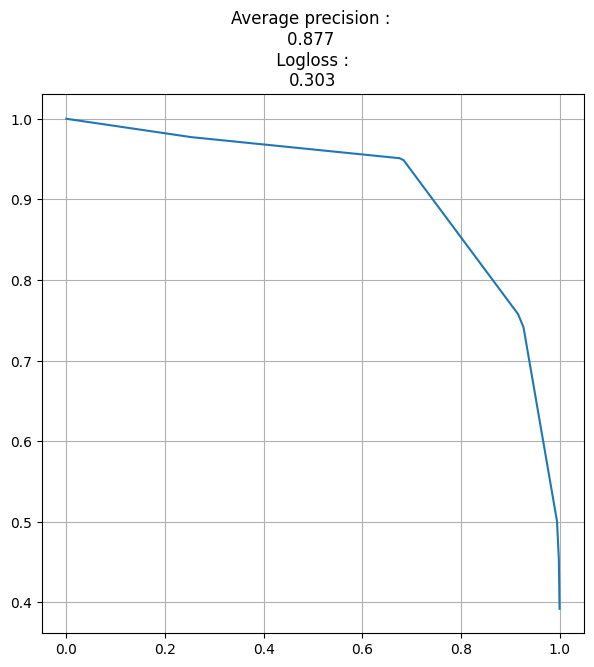

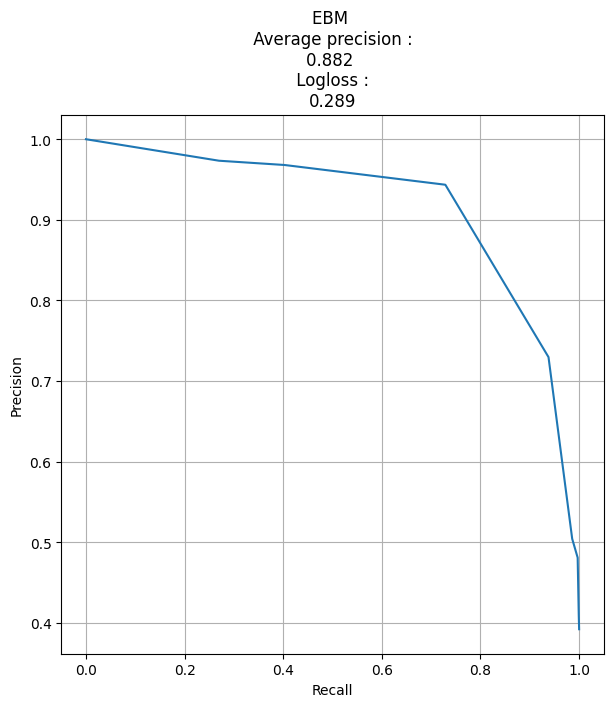

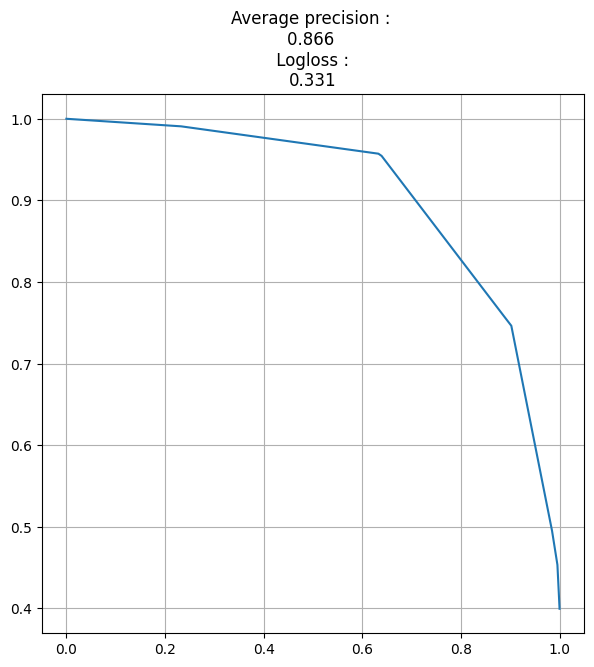

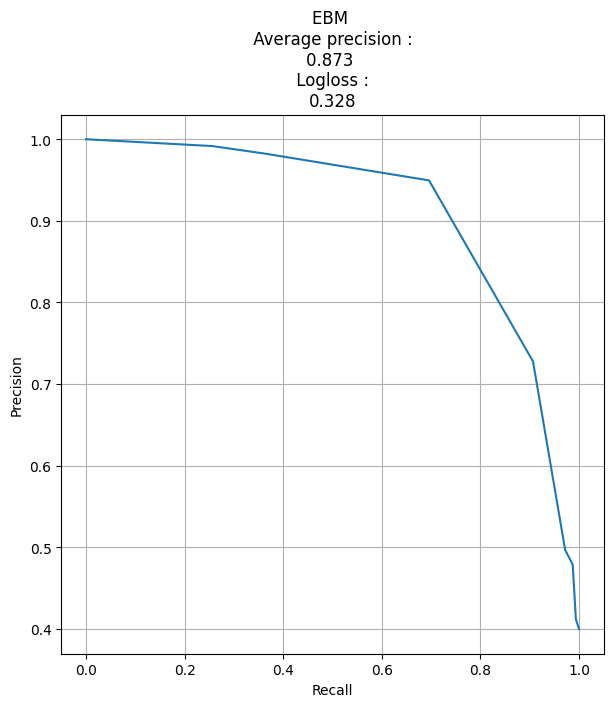

The Risk Score is:
1.                  WordFreqRemove < 0.01     -2 point(s) |   ...
2.                      WordFreqHP < 0.01      3 point(s) | + ...
3.       CharFreqExcalamationMark < 0.001     -2 point(s) | + ...
4.             CharFreqDollarSign < 0.002     -2 point(s) | + ...
                                                    SCORE | =    
SCORE |  -6.0  |  -4.0  |  -3.0  |  -2.0  |
RISK  |   0.7% |   4.7% |  11.9% |  26.9% |
SCORE |  -1.0  |   0.0  |   1.0  |   3.0  |
RISK  |  50.0% |  73.1% |  88.1% |  98.2% |
| FEATURE-POINT CARD |
| Feature                       | Description                   | Point(s)   |       |
|:------------------------------|:------------------------------|:-----------|:------|
| WordFreqRemove < 0.01         | WordFreqRemove < 0.01         | -2.0       | ...   |
| CapitalRunLengthLongest < 9.5 | CapitalRunLengthLongest < 9.5 | -1.0       | + ... |
| CharFreqDollarSign < 0.002    | CharFreqDollarSign < 0.002    | -1.0       | + ... |
| WordFreqHP < 0.

In [10]:
y_proba = RiskScoreClassifier_m.predict_prob(X_train_binarized.values)

precision, recall, thresholds = precision_recall_curve(y_train, y_proba)
fig, ax = plt.subplots(figsize=(7, 7))
plt.plot(recall, precision)
average_precision = np.round(average_precision_score(y_train.astype(int), y_proba), 3)
logloss = np.round(log_loss(y_train.astype(int), y_proba), 3)
title_PR_curve = f"Average precision : \n{average_precision} \n Logloss : \n{logloss}"
plt.title(title_PR_curve)
plt.grid()
plt.show()

y_proba = ebm_model.predict_proba(X_train)[:, 1].reshape(-1, 1)

precision, recall, thresholds = precision_recall_curve(y_train.astype(int), y_proba)
fig, ax = plt.subplots(figsize=(7, 7))
plt.plot(recall, precision)
average_precision = np.round(average_precision_score(y_train.astype(int), y_proba), 3)
logloss = np.round(log_loss(y_train.astype(int), y_proba), 3)
title_PR_curve = f"EBM \n Average precision : \n{average_precision} \n Logloss : \n{logloss}"
plt.title(title_PR_curve)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()



y_proba = RiskScoreClassifier_m.predict_prob(X_test_binarized.values)

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
fig, ax = plt.subplots(figsize=(7, 7))
plt.plot(recall, precision)
average_precision = np.round(average_precision_score(y_test.astype(int), y_proba), 3)
logloss = np.round(log_loss(y_test.astype(int), y_proba), 3)
title_PR_curve = f"Average precision : \n{average_precision} \n Logloss : \n{logloss}"
plt.title(title_PR_curve)
plt.grid()
plt.show()






y_proba = ebm_model.predict_proba(X_test)[:, 1].reshape(-1, 1)

precision, recall, thresholds = precision_recall_curve(y_test.astype(int), y_proba)
fig, ax = plt.subplots(figsize=(7, 7))
plt.plot(recall, precision)
average_precision = np.round(average_precision_score(y_test.astype(int), y_proba), 3)
logloss = np.round(log_loss(y_test.astype(int), y_proba), 3)
title_PR_curve = f"EBM \n Average precision : \n{average_precision} \n Logloss : \n{logloss}"
plt.title(title_PR_curve)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

X_featureNames = list(X_train_binarized.columns[:])

RiskScoreClassifier_m.reset_featureNames(X_featureNames)
RiskScoreClassifier_m.print_model_card()

ebm_model.summary()